In [6]:
import koreanize_matplotlib

In [11]:
import pandas as pd
from scipy.stats import f_oneway

data = pd.read_csv(f'/Users/leesangwon/Downloads/perpbrroe_.csv', encoding="utf-8")

# 그룹화하여 ANOVA 수행
groups = [data[data['최종 라벨링'] == label][['ROE', 'PER', 'PBR']] for label in data['최종 라벨링'].unique()]
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat}, p-value: {p_value}")

F-statistic: [4.20615502 0.67735734 1.98647756], p-value: [0.01929191 0.51161784 0.14567809]


In [12]:
import pandas as pd
from scipy.stats import f_oneway

data = pd.read_csv(f'/Users/leesangwon/Downloads/per양수.csv', encoding="utf-8")

# 그룹화하여 ANOVA 수행
groups = [data[data['최종 라벨링'] == label][['ROE', 'PER', 'PBR']] for label in data['최종 라벨링'].unique()]
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat}, p-value: {p_value}")

F-statistic: [0.34492095 0.07802418 2.50942623], p-value: [0.71135172 0.92514984 0.10009976]


In [13]:
import pandas as pd

# 데이터 로드
data = pd.read_csv(f'/Users/leesangwon/Downloads/재무정보데이터.csv', encoding="utf-8")


# 숫자로 변환해야 할 컬럼 목록
columns_to_convert = [
    "매출성장률", "부채비율", "영업활동현금흐름", "유동비율", "유동자산",
    "유동부채", "부채", "자기자본", "영업현금흐름", "매출6월말 ", "전기매출",
    "당기순이익", "6월말 EPS"
]

# %, ',' 제거 후 float으로 변환
for col in columns_to_convert:
    data[col] = data[col].replace({",": "", "%": ""}, regex=True).astype(float)

# PER, PBR, ROE 제외한 데이터
filtered_data = data.drop(columns=['PER', 'PBR', 'ROE'])

# 최종 라벨링과 상관관계 계산
correlation_filtered = filtered_data.corr()['최종 라벨링']

# 상관관계 내림차순 정렬
correlation_sorted = correlation_filtered.sort_values(ascending=False)

# 결과 출력
print(correlation_sorted)

최종 라벨링      1.000000
부채비율        0.151527
매출성장률       0.011592
6월말 주가     -0.039126
자기자본       -0.104626
유동부채       -0.120966
부채         -0.124600
영업활동현금흐름   -0.126885
영업현금흐름     -0.126885
유동자산       -0.158537
당기순이익      -0.159387
전기매출       -0.173334
매출6월말      -0.176846
유동비율       -0.193493
6월말 EPS    -0.211008
Name: 최종 라벨링, dtype: float64


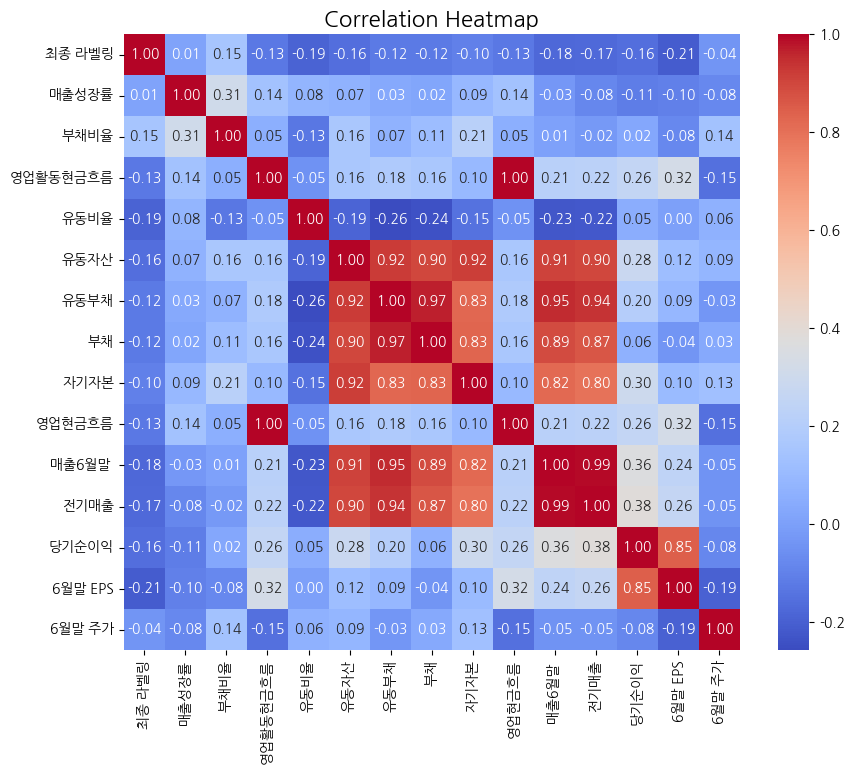

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬 계산
correlation_matrix = filtered_data.corr()

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# 제목 및 시각화
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

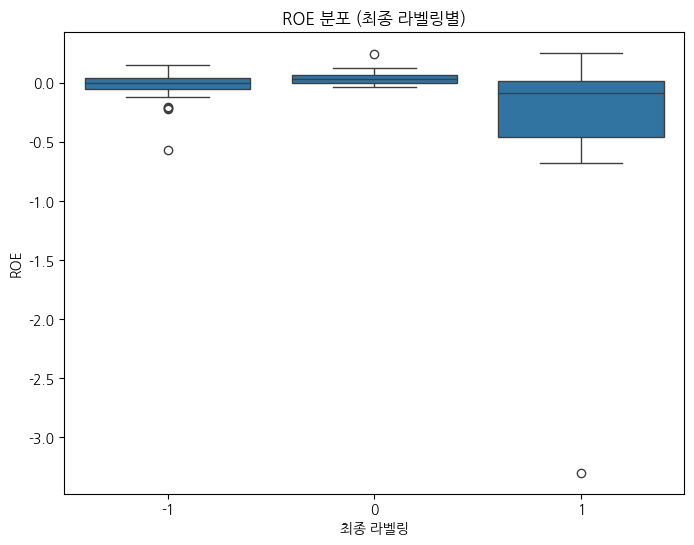

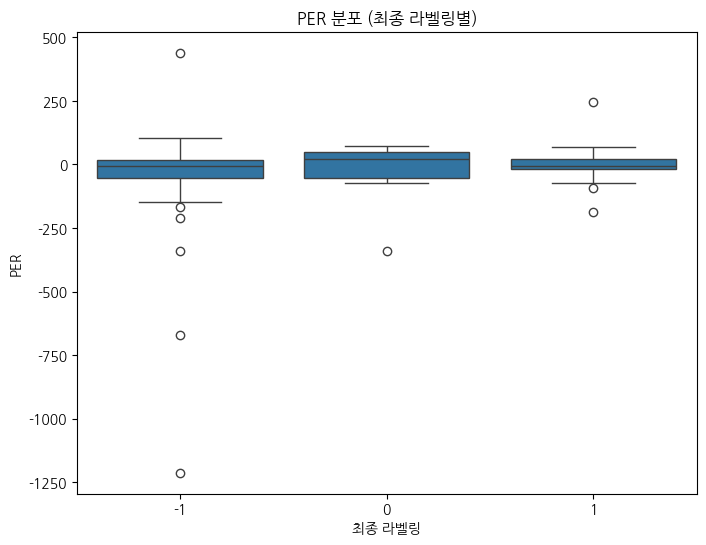

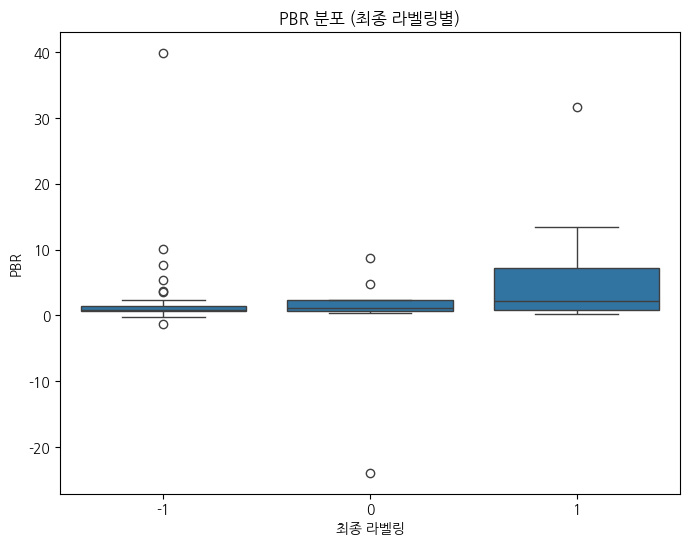

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# ROE에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='최종 라벨링', y='ROE', data=data)
plt.title("ROE 분포 (최종 라벨링별)")
plt.xlabel("최종 라벨링")
plt.ylabel("ROE")
plt.show()

# PER에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='최종 라벨링', y='PER', data=data)
plt.title("PER 분포 (최종 라벨링별)")
plt.xlabel("최종 라벨링")
plt.ylabel("PER")
plt.show()

# PBR에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='최종 라벨링', y='PBR', data=data)
plt.title("PBR 분포 (최종 라벨링별)")
plt.xlabel("최종 라벨링")
plt.ylabel("PBR")
plt.show()